Gmail : gautamshemoy551@gmail.com

##K - Means Clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Exposys Data Lab Internship'

/content/drive/MyDrive/Exposys Data Lab Internship


In [ ]:
ls

 code.zip                             'Exposys Data Lab Internship Report.gdoc'
 ExposysDataLabIntenshipCode.ipynb     Mall_Customers.csv
 ExposysDataLabInternshipPPT.gslides


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Checking Null Values

In [ ]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Analysis of Customers based on Age and Gender

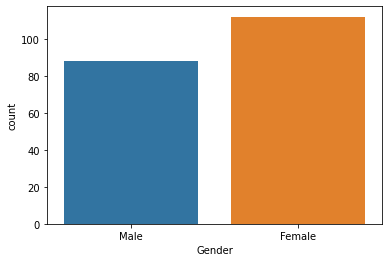

In [ ]:
sns.countplot(x='Gender',data=data)

As we see there are more females shoppers then male

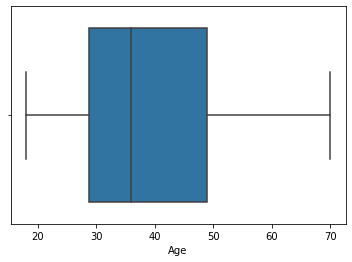

In [ ]:
sns.boxplot(x = data['Age'])

As we see from the box plot that most of the customers are in age group 30 - 35 .. Lowest being almost 18 and oldest being 70

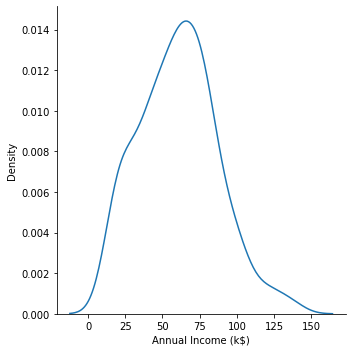

In [ ]:
sns.displot(data, x="Annual Income (k$)", kind="kde")

From the density plot its clear that most of our customers are having annual income in the range 60-70k 

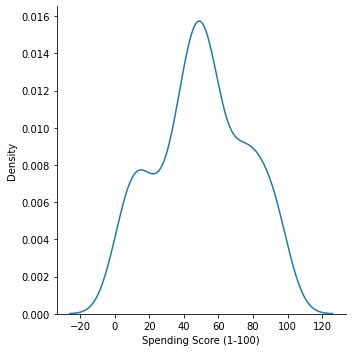

In [ ]:
sns.displot(data, x="Spending Score (1-100)", kind="kde")

From the density plot we observe that most customers have spending score of about 50

Categoric to Numeric

In [ ]:
data['Gender'] = data['Gender'].apply({'Male' : 0, 'Female' : 1}.get)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Normalising Values

In [ ]:
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_data = pd.DataFrame(x_scaled)
norm_data.head()

,0,1,2,3,4
0,0.000000,0.0,0.019231,0.000000,0.387755
1,0.005025,0.0,0.057692,0.000000,0.816327
2,0.010050,1.0,0.038462,0.008197,0.051020
3,0.015075,1.0,0.096154,0.008197,0.775510
4,0.020101,1.0,0.250000,0.016393,0.397959


Customer ID is not needed so we just pop it

In [ ]:
norm_data.pop(0)
norm_data.head()

,1,2,3,4
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


Finding optimal K

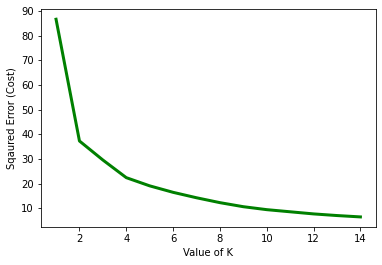

In [ ]:
cost =[]
for i in range(1, 15):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(norm_data)
    cost.append(KM.inertia_) # calculate squared error for the clustered points   
  
# plot the cost against K values
plt.plot(range(1, 15), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() 

Approx Optimal Value for K : 6 (Elbow Method) 

In [ ]:
km = KMeans(n_clusters = 6)
y_predicted = km.fit_predict(norm_data[[1, 2, 3, 4]])
y_predicted

array([1, 1, 2, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 1, 2, 1, 3, 2, 3, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 3, 2, 3, 1, 0, 2, 0, 2, 0, 2, 0, 1, 3, 2,
       0, 2, 0, 2, 2, 2, 0, 1, 2, 3, 0, 3, 0, 3, 2, 3, 3, 1, 0, 0, 3, 1,
       0, 0, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 2, 0, 3, 1, 3, 0, 2, 3, 0, 2,
       2, 0, 0, 1, 3, 0, 2, 1, 0, 2, 3, 1, 2, 0, 3, 1, 3, 2, 0, 3, 3, 3,
       3, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 5, 3, 1, 3, 1, 4, 1,
       2, 5, 4, 5, 0, 1, 4, 5, 0, 1, 2, 5, 4, 1, 3, 5, 0, 1, 4, 1, 0, 5,
       0, 5, 4, 5, 4, 5, 0, 5, 4, 5, 3, 5, 4, 5, 0, 1, 4, 1, 4, 1, 0, 5,
       3, 1, 3, 1, 0, 5, 4, 5, 0, 1, 0, 1, 0, 5, 0, 5, 4, 5, 0, 5, 0, 1,
       4, 1], dtype=int32)

In [ ]:
norm_data['clusters'] = y_predicted
norm_data.head()

,1,2,3,4,clusters
0,0.0,0.019231,0.000000,0.387755,1
1,0.0,0.057692,0.000000,0.816327,1
2,1.0,0.038462,0.008197,0.051020,2
3,1.0,0.096154,0.008197,0.775510,2
4,1.0,0.250000,0.016393,0.397959,2


In [ ]:
data['clusters'] = y_predicted
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,2
3,4,1,23,16,77,2
4,5,1,31,17,40,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

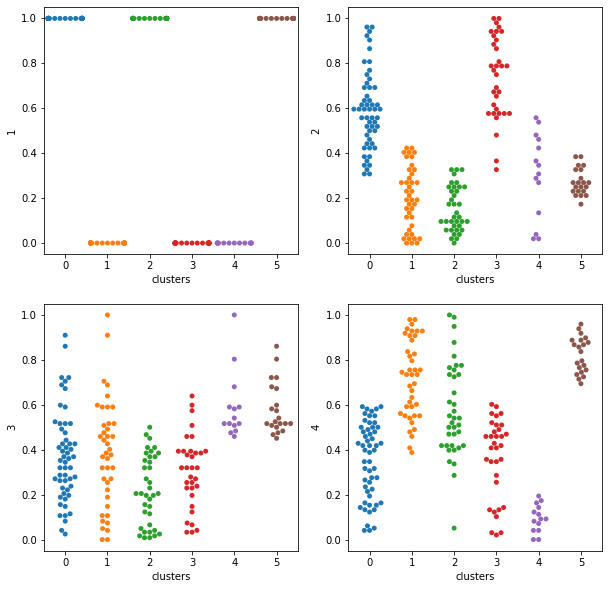

In [ ]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(2,2, figsize=(10,10))

#three rows and 2 columns all starting from (0,0)

sns.swarmplot(norm_data['clusters'], norm_data[1], ax = axarr[0][0])  # clusters visualised for Gender
sns.swarmplot(norm_data['clusters'], norm_data[2], ax = axarr[0][1])  # clusters visualised for Age
sns.swarmplot(norm_data['clusters'], norm_data[3], ax = axarr[1][0])  # clusters visualised for Annual Income (k$)
sns.swarmplot(norm_data['clusters'], norm_data[4], ax=axarr[1][1]) # clusters visualised for Spending Score (1-100)

**So based on the above Graphs we can come to conclusion that our customers are divided in `6` segments**

```
Segment 1 => Cluster 0 : Medium Income Medium Spending

Segment 2 => Cluster 1 : Medium Income High Spending

Segment 3 => Cluster 2 : Medium Income High Spending

Segment 4 => Cluster 3 : Low Income Low Spending

Segment 5 => Cluster 4 : High Income Low Spending

Segment 6 => Cluster 5 : High Income High Spending
```